**PREDICTING COVID CASES USING TIME SERIES ANALYSIS**




1. C Venkatesh





**Dataset from 30-01-2020 to 24-06-2021**

Features- Date, Confirmed, Deaths,Cured

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_india.csv to covid_19_india (1).csv


In [ ]:
#Importing necessary required header files
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import io
covid_india = pd.read_csv(io.BytesIO(uploaded['covid_19_india.csv']))
covid_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
#Filtering Tamilnadu alone
data_tn = covid_india[covid_india["State/UnionTerritory"]=="Tamil Nadu"]
df_tn=data_tn[["Date","Confirmed","Cured","Deaths"]]
df_tn.tail()

,Date,Confirmed,Cured,Deaths
16232,2021-06-20,2414680,2304885,31015
16268,2021-06-21,2422497,2321928,31197
16304,2021-06-22,2429924,2337209,31386
16340,2021-06-23,2436819,2348353,31580
16376,2021-06-24,2443415,2358785,31746


In [ ]:
df_tn.describe()

,Confirmed,Cured,Deaths
count,4.750000e+02,4.750000e+02,475.000000
mean,6.539112e+05,6.016578e+05,9069.484211
std,5.848598e+05,5.354211e+05,7272.455041
min,1.000000e+00,0.000000e+00,0.000000
25%,1.005565e+05,5.719950e+04,1353.000000
50%,7.194030e+05,6.834640e+05,11053.000000
75%,8.498625e+05,8.333245e+05,12480.500000
max,2.443415e+06,2.358785e+06,31746.000000


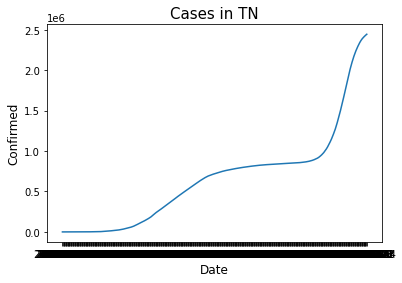

In [ ]:
# Setting the Date as Index
train1 = df_tn[["Date","Confirmed"]].set_index('Date')
train1.sort_index(inplace=True)
plt.plot(train1)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Confirmed', fontsize=12)
plt.title("Cases in TN", fontsize=15)
plt.savefig('death.jpeg', dpi=300, bbox_inches='tight')
plt.show()

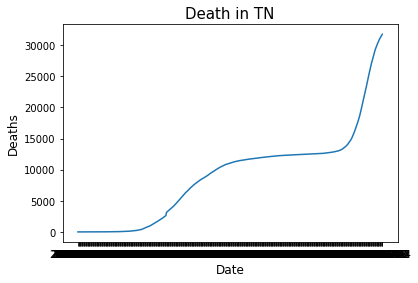

In [ ]:
# Setting the Date as Index
train2 = df_tn[["Date","Deaths"]].set_index('Date')
train2.sort_index(inplace=True)
plt.plot(train2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.title("Death in TN", fontsize=15)
plt.show()


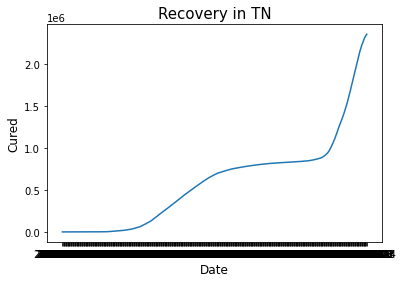

In [ ]:
# Setting the Date as Index
train2 = df_tn[["Date","Cured"]].set_index('Date')
train2.sort_index(inplace=True)
plt.plot(train2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cured', fontsize=12)
plt.title("Recovery in TN", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



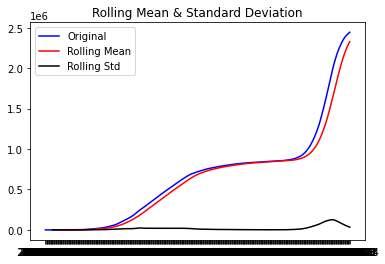

ADF Stastistic: 1.460645
p-value: 0.997373
The graph is non stationery
Critical values:
	1%: -3.445 
	5%: -2.868 
	10%: -2.570 


In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plot
def test_stationarity(x):
    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train1['Confirmed']      
test_stationarity(ts)

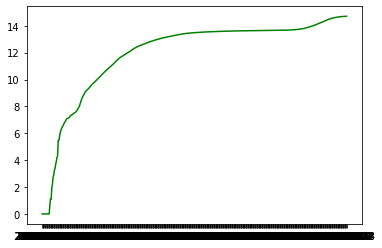

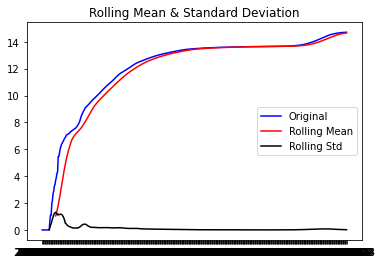

ADF Stastistic: -6.691249
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.445 
	5%: -2.868 
	10%: -2.570 


In [ ]:
ts_log = np.log(ts)
plot.plot(ts_log,color="green")
plot.show()
test_stationarity(ts_log)

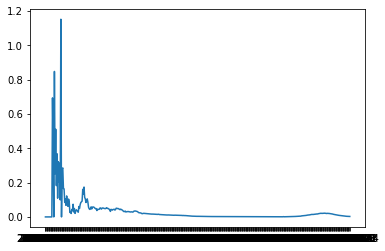

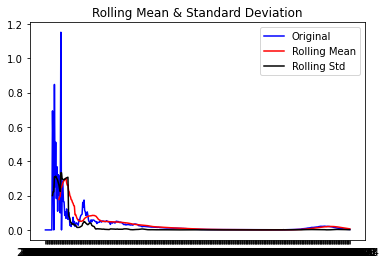

ADF Stastistic: -8.917918
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.445 
	5%: -2.868 
	10%: -2.570 


In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

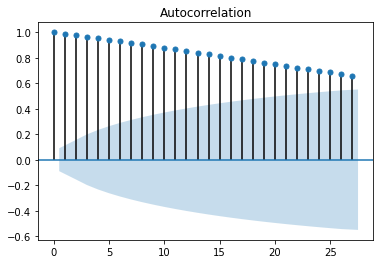

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts)
plt.show()

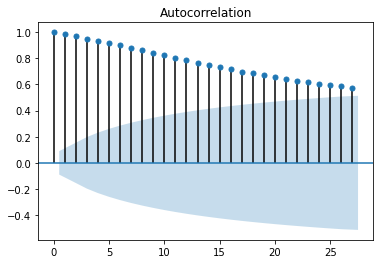

In [ ]:
plot_acf(ts_log)
plt.show()

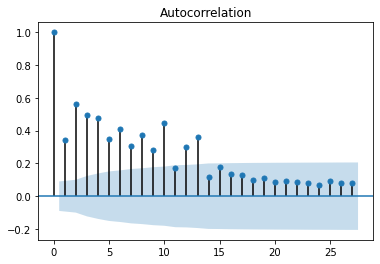

In [ ]:
plot_acf(ts_log_diff)
plt.show()

** ARIMA MODEL **


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



Date=2021-05-08,predicted=1323069.713316, expected=1323965.000000
Date=2021-05-09,predicted=1351374.184622, expected=1351362.000000
Date=2021-05-10,predicted=1379678.602706, expected=1380259.000000
Date=2021-05-11,predicted=1410407.735633, expected=1409237.000000
Date=2021-05-12,predicted=1439027.164146, expected=1438509.000000
Date=2021-05-13,predicted=1468714.578516, expected=1468864.000000
Date=2021-05-14,predicted=1500291.776160, expected=1499485.000000
Date=2021-05-15,predicted=1530767.759758, expected=1531377.000000
Date=2021-05-16,predicted=1564259.054958, expected=1565035.000000
Date=2021-05-17,predicted=1599705.036096, expected=1598216.000000
Date=2021-05-18,predicted=1631891.554178, expected=1631291.000000
Date=2021-05-19,predicted=1665266.965229, expected=1664350.000000
Date=2021-05-20,predicted=1697987.640843, expected=1699225.000000
Date=2021-05-21,predicted=1735124.442154, expected=1734804.000000
Date=2021-05-22,predicted=1770865.356395, expected=1770988.000000
Date=2021-

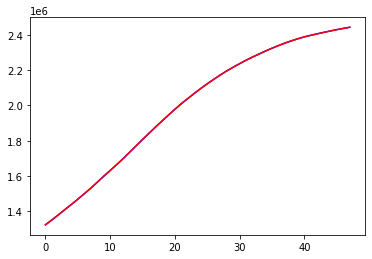

In [ ]:
#ARIMA
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


series=ts
# split into train and test sets
X = series.values
Y=series.index
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
test_date=Y[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,2,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Date=%s,predicted=%f, expected=%f' % (test_date[t],yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test,color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()

**PREDICTION FOR NEXT 15 DAYS**


In [ ]:
#Forecasting for next 15 days
import datetime
date = datetime.datetime(2021,6,24)
print("Date","\tPrediction")
for i in range(30): 
    date += datetime.timedelta(days=1)
    print(date.strftime('%d/%m/%Y'),int(model_fit.forecast(30)[0][i])) 









Date 	Prediction
25/06/2021 2443182
26/06/2021 2449062
27/06/2021 2454493
28/06/2021 2459482
29/06/2021 2464039
30/06/2021 2468175
01/07/2021 2471905
02/07/2021 2475243
03/07/2021 2478200
04/07/2021 2480789
05/07/2021 2483020
06/07/2021 2484905
07/07/2021 2486455
08/07/2021 2487679
09/07/2021 2488588
10/07/2021 2489192
11/07/2021 2489499
12/07/2021 2489520
13/07/2021 2489263
14/07/2021 2488735
15/07/2021 2487947
16/07/2021 2486905
17/07/2021 2485617
18/07/2021 2484090
19/07/2021 2482333
20/07/2021 2480352
21/07/2021 2478153
22/07/2021 2475743
23/07/2021 2473129
24/07/2021 2470317
